In [1]:
import tensorflow as tf
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import (Dense, Dropout, GlobalAveragePooling2D)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    r"..\dataset\FishImgDataset\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    r"..\dataset\FishImgDataset\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes


Found 3520 images belonging to 8 classes.
Found 1185 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_mobilenet = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_mobilenet.trainable = False

x = base_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_mobilenet.input, outputs=output)


In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',      # pantau loss validasi
    patience=5,              # berhenti jika 5 epoch tidak membaik
    restore_best_weights=True
)

history_mobilenet = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stopping]
)



Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9301 - loss: 0.1992 - val_accuracy: 0.9544 - val_loss: 0.1475
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9440 - loss: 0.1513 - val_accuracy: 0.9527 - val_loss: 0.1450
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9548 - loss: 0.1412 - val_accuracy: 0.9705 - val_loss: 0.0982
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9682 - loss: 0.0995 - val_accuracy: 0.9789 - val_loss: 0.0698
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9668 - loss: 0.0982 - val_accuracy: 0.9713 - val_loss: 0.0875
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9705 - loss: 0.0891 - val_accuracy: 0.9738 - val_loss: 0.0957
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9705 - loss: 0.0867 - val_accuracy: 0.9705 - val_loss: 0.0742
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9781 - loss: 0.0683 - val_accu

In [16]:
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    y_pred = np.argmax(y_pred, axis=1)

    print(classification_report(
        y_true, y_pred,
        target_names=generator.class_indices.keys()
    ))
    return y_true, y_pred


In [18]:
y_true_mob, y_pred_mob = evaluate_model(model, val_gen)

38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 755ms/step
                precision    recall  f1-score   support

       Catfish       0.99      1.00      0.99        97
Glass Perchlet       1.00      0.99      1.00       124
          Goby       0.95      0.99      0.97       189
       Gourami       1.00      0.97      0.98        97
    Grass_Carp       1.00      0.99      0.99       378
     Knifefish       1.00      1.00      1.00       100
   Silver Barb       1.00      0.97      0.99       105
       Tilapia       0.97      0.98      0.97        95

      accuracy                           0.99      1185
     macro avg       0.99      0.99      0.99      1185
  weighted avg       0.99      0.99      0.99      1185



In [19]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


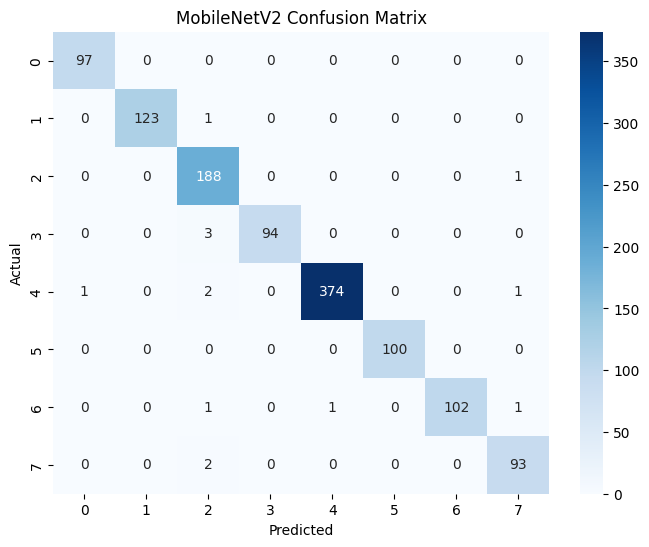

In [20]:
plot_confusion(y_true_mob, y_pred_mob, "MobileNetV2 Confusion Matrix")

In [21]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.legend(['Train', 'Validation'])

    plt.show()


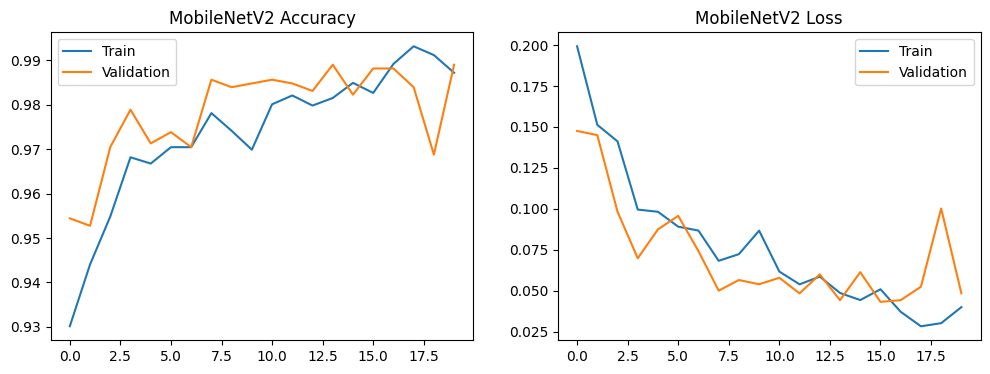

In [22]:
plot_history(history_mobilenet, "MobileNetV2")

In [38]:
def save_best_model(model, history, model_name):
    import os

    # keluar dari folder notebook → masuk folder model
    save_dir = os.path.join("..", "model")
    os.makedirs(save_dir, exist_ok=True)

    # ambil val_accuracy terbaik
    best_val_acc = max(history.history['val_accuracy'])

    save_path = os.path.join(
        save_dir,
        f"{model_name}_valacc_{best_val_acc:.4f}.h5"
    )

    model.save(save_path)

    print(f"Best model '{model_name}' disimpan di:")
    print(os.path.abspath(save_path))


In [40]:
model.save("model/mobilenetv2_fish_classifier.h5", save_format="h5")


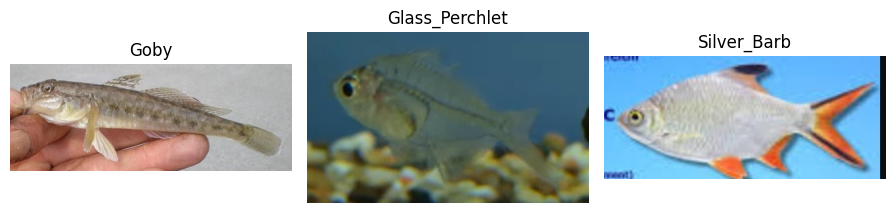

In [32]:
#GAMBAR SECARA ACAK DARI DATA TEST

import os
import random

test_dir = r"..\dataset\FishImgDataset\test"
# ambil semua path gambar di folder test
all_images = []
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            all_images.append(os.path.join(class_path, img_name))

# pilih gambar secara acak
random_samples = random.sample(all_images, 3)


import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 8))

for i, img_path in enumerate(random_samples):
    img = Image.open(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)

    # ambil nama kelas dari folder
    class_name = os.path.basename(os.path.dirname(img_path))
    plt.title(class_name)

    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


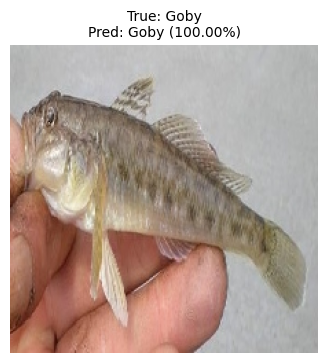

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


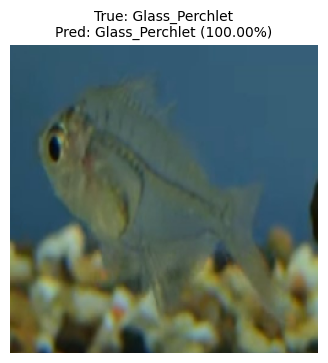

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


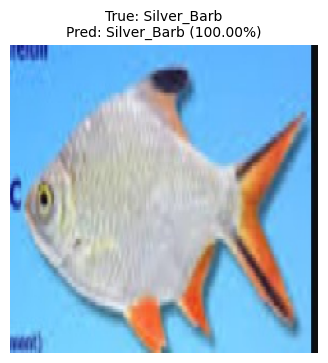

In [34]:
#PREDIKSI GAMBAR RANDOM
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os

class_names = list(train_gen.class_indices.keys())

for img_path in random_samples:
    # ===== TRUE LABEL (dari folder) =====
    true_label = os.path.basename(os.path.dirname(img_path))

    # ===== LOAD & PREPROCESS IMAGE =====
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ===== PREDIKSI =====
    preds = model.predict(img_array)
    pred_idx = np.argmax(preds, axis=1)[0]
    pred_label = class_names[pred_idx]
    confidence = np.max(preds) * 100

    # ===== VISUALISASI =====
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(
        f"True: {true_label}\nPred: {pred_label} ({confidence:.2f}%)",
        fontsize=10
    )
    plt.axis("off")
    plt.show()
